In [1]:
!conda install -y gdown

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.10.0      |     pyha770c72_0          77 KB  conda-forge
    filelock-3.5.0             |     pyhd8ed1ab_0          12 KB  conda-forge
    gdown-4.2.1                |     pyhd8ed1ab_0          16 KB  conda-forge
    soupsieve-2.3.1            |     pyhd8ed

In [2]:
!wget https://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2022-02-16 08:37:29--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-02-16 08:37:30--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1.75G  5.04MB/s    in 5m 54s  

2022-02-16 08:43:24 (5.06 MB/s) - ‘glove.42B.300d.zip’ saved [1877800501/1877800501]

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [3]:
#!wget https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt

In [4]:
#https://github.com/minimaxir/char-embeddings/blob/master/create_embeddings.py

import numpy as np
import os
from tqdm import tqdm

file_path = "glove.42B.300d.txt"

vectors = {}
with open(file_path,'r', encoding="utf8") as f:
    for line in tqdm(f):
        line_split = line.strip().split(" ")
        vec = np.array(line_split[1:], dtype=float)
        word = line_split[0]

        for char in word:
            if ord(char) < 128:
                if char in vectors:
                    vectors[char] = (vectors[char][0] + vec,
                                     vectors[char][1] + 1)
                else:
                    vectors[char] = (vec, 1)

1917494it [03:08, 10174.15it/s]


In [6]:
#base_name = os.path.splitext(os.path.basename(file_path))[0] + '-char.txt'
with open("glove.42B.300d-char.txt",'w',encoding = 'utf-8') as f2:
    for word in vectors:
        #print(word)
        avg_vector = np.round(
            (vectors[word][0] / vectors[word][1]), 6).tolist()
        f2.write(word + " " + " ".join(str(x) for x in avg_vector) + "\n")

In [7]:
!gdown --id 1GyJFqydGVTdyGH1EhJ6ZXzG5lcQvVdZD

Downloading...
From: https://drive.google.com/uc?id=1GyJFqydGVTdyGH1EhJ6ZXzG5lcQvVdZD
To: /kaggle/working/TextClassification_CNN.csv
100%|███████████████████████████████████████| 56.4M/56.4M [00:00<00:00, 197MB/s]


In [8]:
### Model-2 : Using 1D convolutions with character embedding

In [9]:
import pandas as pd
df = pd.read_csv("TextClassification_CNN.csv")
df.head()

,text,target,emails,subjects,cleaned_texts
0,From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...,talk.politics.misc,stratus encore encore rocket stratus vos stratus,Limiting Govt (was Re: Employment (was Re: Wh...,in article let explain some possible me...
1,From: as010b@uhura.cc.rochester.edu (Tree of S...,talk.politics.misc,uhura rochester edu optilink optilink hilbert ...,Why not concentrate on child molesters?,in in article article however m...
2,From: cramer@optilink.COM (Clayton Cramer)\nSu...,talk.politics.misc,optilink rigel econ uga edu rigel econ uga edu...,Lincoln & slavery (Re: Top Ten Tricks You Can...,in article article the argument that slave...
3,From: pyotr@halcyon.com (Peter D. Hampe)\nSubj...,talk.politics.misc,halcyon dscomsa desy halcyon,"Phill says Koresh == Hitler, was Welcome to P...",the murderes four police officers justic...
4,From: rja@mahogany126.cray.com (Russ Anderson)...,talk.politics.misc,mahogany126 cray desire wright edu desire wrig...,The state of justice,in article judge denied new trial motion e...


In [10]:
df_processed = df['emails'] + df['subjects'] + df['text']

In [11]:
df_processed[0]

'stratus encore encore rocket stratus vos stratus Limiting Govt (was Re: Employment (was Re: Why not concentrate...)From: cdt@sw.stratus.com (C. D. Tavares)\nSubject: Re: Limiting Govt (was Re: Employment (was Re: Why not concentrate...)\n\n(misc.legal trimmed)\n\nIn article <C5uqsM.3I9@encore.com>, rcollins@ns.encore.com (Roger Collins) writes:\n\n> Let me explain some possible "means" to libertarian-style government\n> one last time.\n\n> If the dominate philosophy of a society held that it was OK to kill your\n> neighbor for sport, no government system (except a strong tyranny by the\n> minority) could keep the people from killing each other.\n\n> The dominate philosophy in our society holds that it is OK for people to\n> steal and coerce each other as long as it\'s done by vote or through the\n> government machine.  Libertarians realize what this legal stealing and\n> coercion does to a society.\n\n> So just as a society of non-murderers would not vote for the "right" to\n> murder,

In [12]:
df_processed = pd.Series( [str(s).lower() for s in df_processed ])

In [13]:
df_processed[0]

'stratus encore encore rocket stratus vos stratus limiting govt (was re: employment (was re: why not concentrate...)from: cdt@sw.stratus.com (c. d. tavares)\nsubject: re: limiting govt (was re: employment (was re: why not concentrate...)\n\n(misc.legal trimmed)\n\nin article <c5uqsm.3i9@encore.com>, rcollins@ns.encore.com (roger collins) writes:\n\n> let me explain some possible "means" to libertarian-style government\n> one last time.\n\n> if the dominate philosophy of a society held that it was ok to kill your\n> neighbor for sport, no government system (except a strong tyranny by the\n> minority) could keep the people from killing each other.\n\n> the dominate philosophy in our society holds that it is ok for people to\n> steal and coerce each other as long as it\'s done by vote or through the\n> government machine.  libertarians realize what this legal stealing and\n> coercion does to a society.\n\n> so just as a society of non-murderers would not vote for the "right" to\n> murder,

In [14]:
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(df_processed,y,test_size = 0.25,stratify = y)

In [16]:
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()
Lencoder.fit(y_train.values)
encoded_Y = Lencoder.transform(y_train.values)
encoded_Y_te = Lencoder.transform(y_test.values)

print(encoded_Y)
min(encoded_Y),max(encoded_Y),encoded_Y.shape

print(encoded_Y_te)
min(encoded_Y_te),max(encoded_Y_te),encoded_Y_te.shape

[17  2  2 ... 13 17  0]
[ 1 16 11 ... 17  8  7]


(0, 19, (4707,))

In [17]:
from keras.utils import np_utils

#Y labels Encoding
y_train_cat = np_utils.to_categorical(encoded_Y)
y_test_cat = np_utils.to_categorical(encoded_Y_te)

y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.], dtype=float32)

In [18]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(14121, 20)
(4707, 20)


In [19]:
from keras.preprocessing import sequence, text

import tensorflow as tf

corpus = "it was the best of times, it was the worst_of times"
corpus = [c + '\n' for c in corpus.split()]
filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n' 
my_tokenizer = text.Tokenizer(char_level=True,
    filters=filters_)
my_tokenizer.fit_on_texts(corpus)
my_tokenizer.word_docs

defaultdict(int,
            {'i': 4,
             '\n': 11,
             't': 8,
             'a': 2,
             'w': 3,
             's': 6,
             'h': 2,
             'e': 5,
             'b': 1,
             'f': 2,
             'o': 2,
             ',': 1,
             'm': 2,
             'r': 1,
             '_': 1})

In [20]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [21]:
len_array_texts = [ len(x) - x.count(" ") for x in X_train.values]

In [22]:
import numpy as np

np.percentile(len_array_texts,90)

2623.0

In [23]:
#https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33
tk = text.Tokenizer(char_level=True, oov_token='UNK')
tk.fit_on_texts(X_train.values)

In [24]:
#https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33

alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1


tk.word_index = char_dict.copy()

tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [25]:
len(tk.word_index)

69

In [26]:
#https://stackoverflow.com/questions/58591223/forcing-tensorflows-tokenizer-to-include-next-line-char

max_len = 2000
X_train_seq = tk.texts_to_sequences(X_train.values)
X_train_padded = sequence.pad_sequences(X_train_seq, maxlen=max_len)

X_test_seq = tk.texts_to_sequences(X_test.values)
X_test_padded = sequence.pad_sequences(X_test_seq, maxlen=max_len)

In [27]:
#X_test_padded = np.array(X_test_padded, dtype='float32')
#X_test_padded = np.array(X_test_padded, dtype='float32')

In [28]:
vocab_size = len(tk.word_index)
vocab_size

69

In [29]:
#https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33
# Embedding weights
#embedding_weights = []  
#embedding_weights.append(np.zeros(vocab_size)) 

#for char, i in tk.word_index.items(): 
#    onehot = np.zeros(vocab_size)
#    onehot[i - 1] = 1
#    embedding_weights.append(onehot)

#embedding_weights = np.array(embedding_weights)

In [30]:
#embedding_weights[1]

In [31]:
#embedding_weights = np.array(embedding_weights)

In [32]:
from tqdm import tqdm

word_index = tk.word_index

embeddings_index = {}
f = open("glove.42B.300d-char.txt",'r', encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32') #np.array([float(val) for val in values[1:]]) #np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

67it [00:00, 9494.51it/s]

Found 67 word vectors.


In [33]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in tqdm(word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

100%|██████████| 69/69 [00:00<00:00, 110334.34it/s]


In [34]:
embedding_matrix[2]

array([ 1.29100005e-03, -1.17920004e-02,  1.94559991e-02,  3.99239995e-02,
       -1.21634997e-01,  8.75400007e-03,  4.65496004e-01, -1.52903005e-01,
        1.19869998e-02,  1.49093002e-01, -6.75759986e-02, -7.13839978e-02,
        3.11270002e-02, -4.29159999e-02,  3.29900011e-02,  2.72780005e-02,
        6.63769990e-02,  8.21200013e-03,  7.43799983e-03,  1.24030001e-02,
       -2.91499998e-02, -2.43549999e-02,  1.03019997e-02, -1.23570003e-02,
       -2.52490006e-02,  5.40250018e-02, -7.67999981e-03,  1.41540002e-02,
        2.65190005e-02,  2.73369998e-02,  7.38160014e-02,  1.74900005e-03,
       -1.30049996e-02,  1.38699999e-02, -1.28710000e-02,  2.85919998e-02,
        3.91299985e-02,  2.26820000e-02, -1.07399998e-02,  2.24399995e-02,
        6.86299987e-03, -4.23870012e-02,  2.73100007e-02,  1.94659997e-02,
        3.09800007e-03,  6.86400011e-03, -4.04900014e-02,  6.48540035e-02,
        3.83789986e-02, -1.31759997e-02, -1.73330009e-02,  1.58590004e-02,
        5.60420007e-02, -

In [35]:
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.regularizers import l2
from keras.layers.embeddings import Embedding
from keras.layers import Input,BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
import os
import datetime
from keras.callbacks import EarlyStopping
import keras.backend as K

In [36]:
#Model 2

#https://keras.io/api/layers/convolution_layers/convolution1d/

inputs = Input(shape=(2000,))

embedding = Embedding(vocab_size + 1,300,weights=[embedding_matrix],input_length=2000,trainable=False)(inputs)

drop_e =Dropout(0.1)(embedding)


ConvL1 = Conv1D(filters=16,kernel_size=4,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                 kernel_regularizer=l2(0.0001),name='ConvL1')(drop_e)


ConvL2 = Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                                      kernel_regularizer=l2(0.0001),name='ConvL2')(ConvL1)


Pool1 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool1')(ConvL2)
batch_norm = BatchNormalization()(Pool1)  
 

drop_p = Dropout(0.2)(batch_norm)


ConvL3 = Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                          kernel_regularizer=l2(0.0001),name='ConvL3')(drop_p)


ConvL4 = Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),
                                                                 kernel_regularizer=l2(0.0001),name='ConvL4')(ConvL3)


Pool2 = MaxPool1D(pool_size=1,strides=1,padding='valid',data_format='channels_last',name='Pool2')(ConvL4)
batch_norm = BatchNormalization()(Pool2)


drop_n =Dropout(0.25)(batch_norm)


flatten = Flatten(data_format='channels_last',name='Flatten')(drop_n)

drop_k =Dropout(0.2)(flatten)

batch_norm = BatchNormalization()(drop_k)  

                                                                                   
dense = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30))(batch_norm)
#output layer
Outputs = Dense(units=20,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(dense)
model_2= Model(inputs=inputs,outputs=Outputs)

2022-02-16 08:49:01.179099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 08:49:01.303545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 08:49:01.304501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 08:49:01.306398: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [37]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras

def recall_custom(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_custom(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_custom(y_true, y_pred):
    precision = precision_custom(y_true, y_pred)
    recall = recall_custom(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def changeLearningRate(epoch,lr):
  if epoch<30:
    lr=0.0001
    return lr
  else :
    lr=0.00001
    return lr

In [38]:
lrschedule = LearningRateScheduler(changeLearningRate)

optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_custom])

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=5, verbose=1)

filepath= "best_model_L1.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

In [39]:
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

model_2.fit(X_train_padded,y_train_cat,epochs=50, validation_data=(X_test_padded,y_test_cat), batch_size=64,
           callbacks=[checkpoint,tensorboard_callback,earlystop,lrschedule])

2022-02-16 08:49:11.357722: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-16 08:49:11.357767: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-16 08:49:11.359924: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-02-16 08:49:11.626702: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-16 08:49:11.626913: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-02-16 08:49:11.762426: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 112968000 exceeds 10% of free system memory.
2022-02-16 08:49:11.954195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-02-16 08:49:15.302234: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/221 [..............................] - ETA: 33:52 - loss: 3.4566 - accuracy: 0.1250 - f1_custom: 0.0282

2022-02-16 08:49:21.295180: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-16 08:49:21.295254: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/221 [..............................] - ETA: 1:16 - loss: 3.5823 - accuracy: 0.0938 - f1_custom: 0.0141 

2022-02-16 08:49:21.606420: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-02-16 08:49:21.607202: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-02-16 08:49:21.740417: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 369 callback api events and 365 activity events. 
2022-02-16 08:49:21.752844: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-16 08:49:21.773245: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21

2022-02-16 08:49:21.781788: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21/eddcaff9fd92.trace.json.gz


 12/221 [>.............................] - ETA: 14s - loss: 3.6010 - accuracy: 0.0586 - f1_custom: 0.0049

2022-02-16 08:49:21.809655: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21

2022-02-16 08:49:21.813809: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21/eddcaff9fd92.memory_profile.json.gz
2022-02-16 08:49:21.815147: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21
Dumped tool data for xplane.pb to logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21/eddcaff9fd92.xplane.pb
Dumped tool data for overview_page.pb to logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21/eddcaff9fd92.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/fits/20220216-084911/train/plugins/profile/2022_02_16_08_49_21/eddcaff9fd92.input_pipelin

221/221 [==============================] - ETA: 0s - loss: 3.3609 - accuracy: 0.0705 - f1_custom: 0.0073

2022-02-16 08:49:25.588090: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 37656000 exceeds 10% of free system memory.


221/221 [==============================] - 15s 24ms/step - loss: 3.3609 - accuracy: 0.0705 - f1_custom: 0.0073 - val_loss: 3.3121 - val_accuracy: 0.0529 - val_f1_custom: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.05290, saving model to best_model_L1.h5
Epoch 2/50
  1/221 [..............................] - ETA: 3s - loss: 3.2595 - accuracy: 0.0938 - f1_custom: 0.0000e+00

2022-02-16 08:49:26.746155: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 183490560 exceeds 10% of free system memory.


221/221 [==============================] - 4s 19ms/step - loss: 3.0766 - accuracy: 0.1068 - f1_custom: 0.0150 - val_loss: 3.3529 - val_accuracy: 0.0591 - val_f1_custom: 0.0106

Epoch 00002: val_accuracy improved from 0.05290 to 0.05906, saving model to best_model_L1.h5
Epoch 3/50
  1/221 [..............................] - ETA: 3s - loss: 2.7944 - accuracy: 0.1562 - f1_custom: 0.0000e+00

2022-02-16 08:49:31.313553: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 183490560 exceeds 10% of free system memory.


221/221 [==============================] - 4s 20ms/step - loss: 2.8826 - accuracy: 0.1390 - f1_custom: 0.0299 - val_loss: 2.9597 - val_accuracy: 0.1151 - val_f1_custom: 0.0227

Epoch 00003: val_accuracy improved from 0.05906 to 0.11515, saving model to best_model_L1.h5
Epoch 4/50
  1/221 [..............................] - ETA: 3s - loss: 2.9551 - accuracy: 0.0938 - f1_custom: 0.0000e+00

2022-02-16 08:49:35.987680: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 183490560 exceeds 10% of free system memory.


221/221 [==============================] - 4s 20ms/step - loss: 2.7092 - accuracy: 0.1818 - f1_custom: 0.0564 - val_loss: 2.9383 - val_accuracy: 0.1253 - val_f1_custom: 0.0485

Epoch 00004: val_accuracy improved from 0.11515 to 0.12535, saving model to best_model_L1.h5
Epoch 5/50
221/221 [==============================] - 4s 19ms/step - loss: 2.5560 - accuracy: 0.2273 - f1_custom: 0.0995 - val_loss: 2.9069 - val_accuracy: 0.1455 - val_f1_custom: 0.0632

Epoch 00005: val_accuracy improved from 0.12535 to 0.14553, saving model to best_model_L1.h5
Epoch 6/50
221/221 [==============================] - 4s 19ms/step - loss: 2.3800 - accuracy: 0.2777 - f1_custom: 0.1518 - val_loss: 2.9241 - val_accuracy: 0.1598 - val_f1_custom: 0.0865

Epoch 00006: val_accuracy improved from 0.14553 to 0.15976, saving model to best_model_L1.h5
Epoch 7/50
221/221 [==============================] - 4s 20ms/step - loss: 2.2042 - accuracy: 0.3305 - f1_custom: 0.2110 - val_loss: 2.9259 - val_accuracy: 0.1625 - val

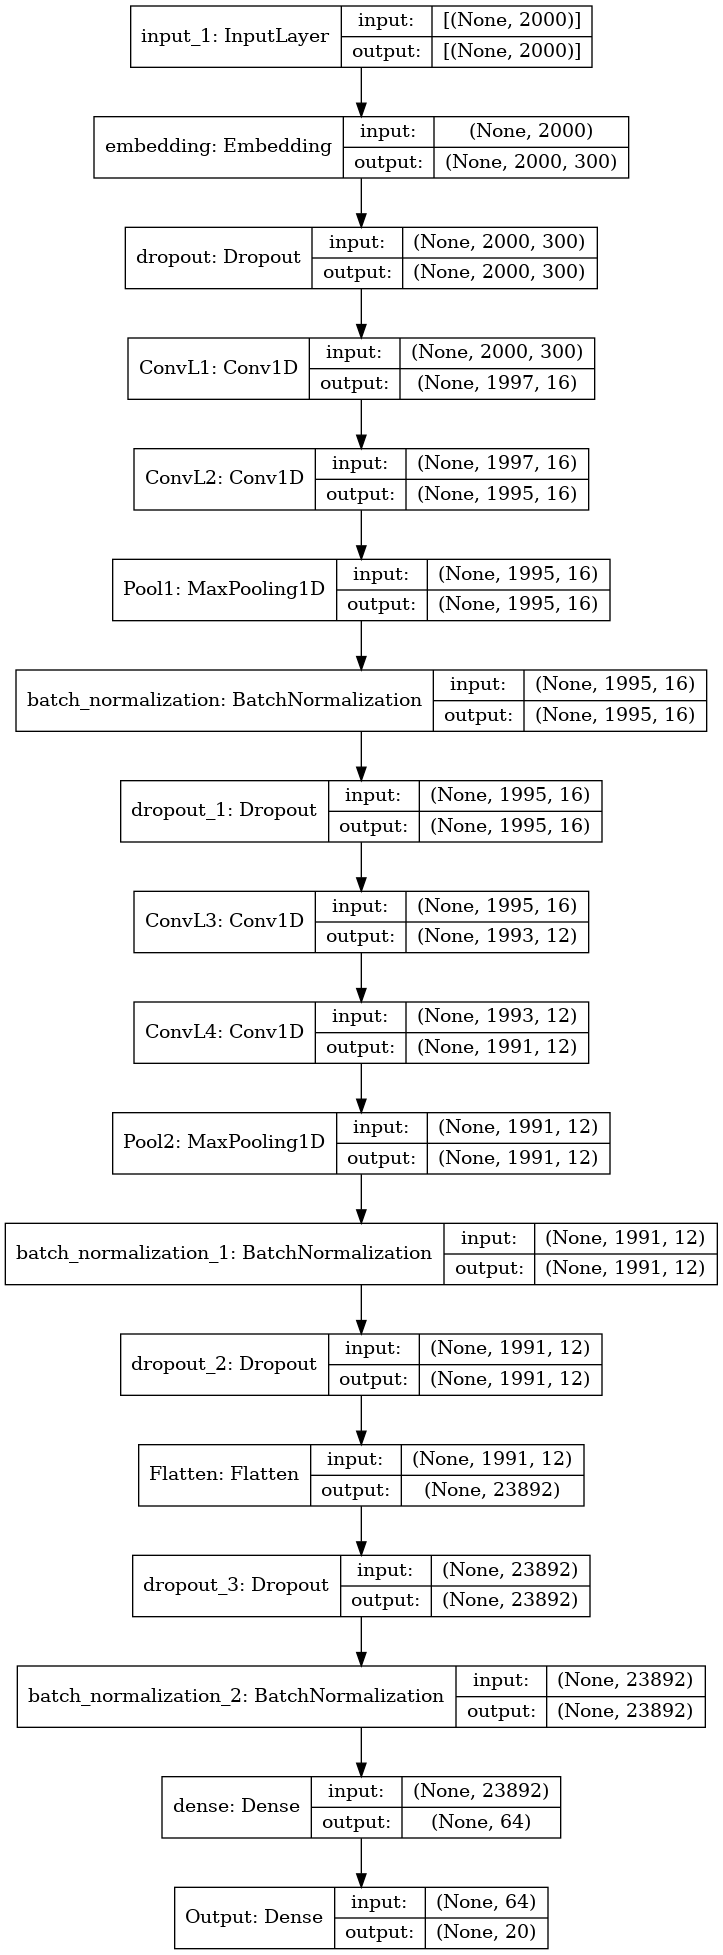

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, 'model_2.png', show_shapes=True)

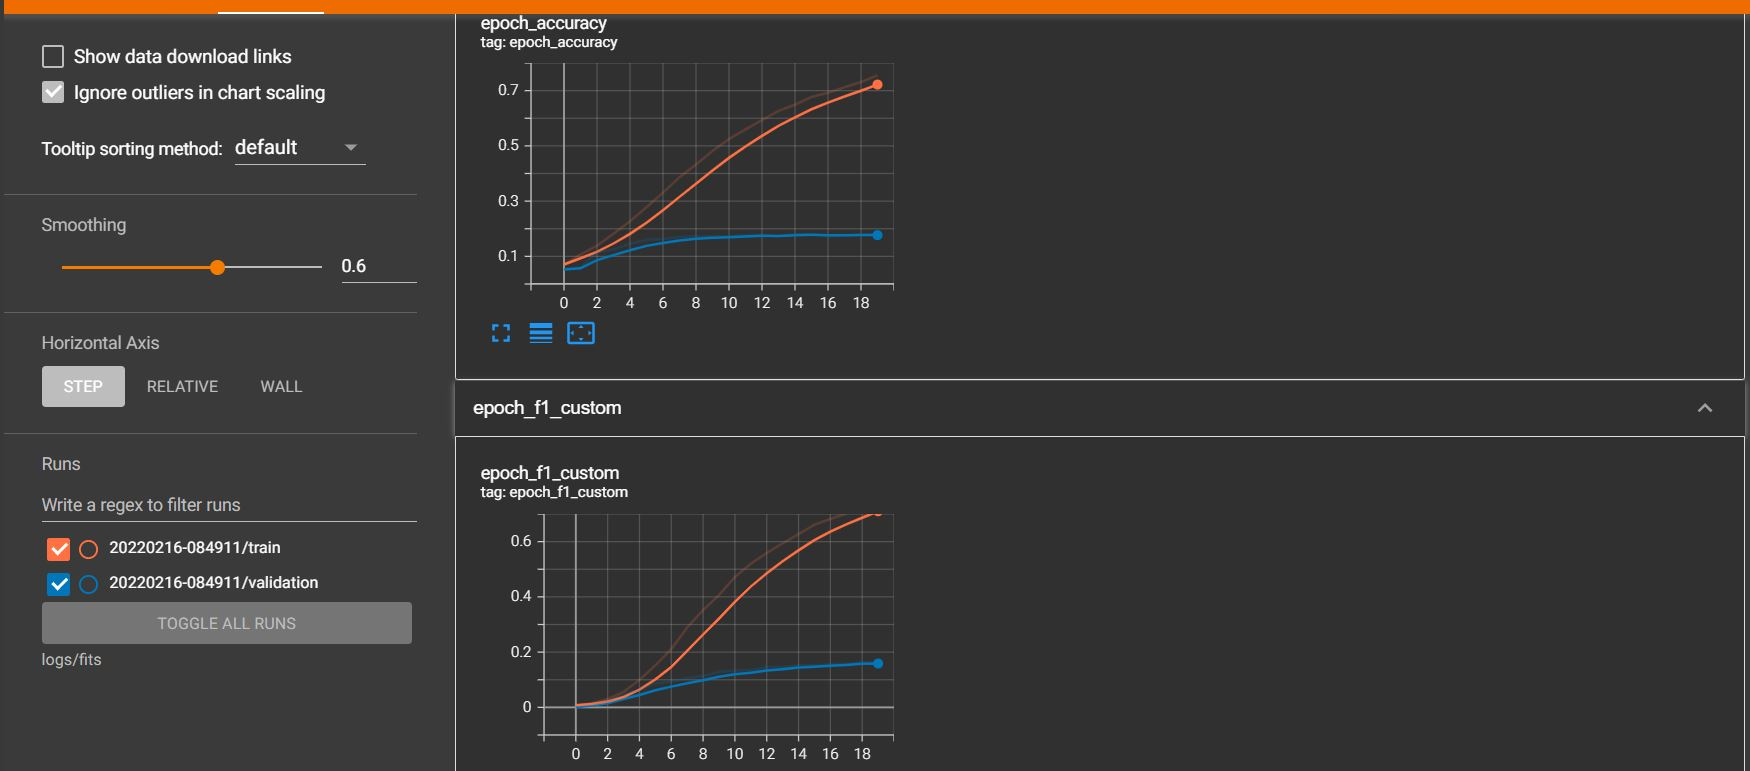

In [6]:
from IPython.display import Image 
Image('Model_2.jpg',width=700,height=700) 